# Homework 02

Group 26, 2021/22

## 1)

 ### a) purpose of activation function

An activation function can store information about the input in each given layer due do the fact that its 
 derivative is dependent on the input. This allows backpropagation.


 ### b) What’s the advantage of e.g. sigmoid over the step function (threshold function)?


 ### c) How does sigmoid look like (the formula as well as the graph)?

 formula: $\sigma(t)=\frac{1}{1+e^{-t}}$ 


 ### d) What is the derivative of sigmoid?

 $\sigma'_i(k) = \sigma_i(k)\ (1 - \sigma_i(k))$

 Note: is in itself not found in the code bc it gets plugged into the formula of the error signals

 
 



In [1]:
# Implement a function sigmoid(x) and a function sigmoidprime(x) (the derivative.

def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def sigmoidprime(x):
    return sigmoid(x)*(1-sigmoid(x))

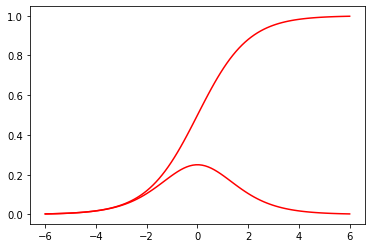

In [2]:
# plotting
import numpy as np
import matplotlib.pyplot as plt

# 100 linearly spaced numbers
x = np.linspace(-6,6,100)
y = np.apply_along_axis(sigmoid,0,x)

# plot the function
plt.plot(x,y, 'r')

y = np.apply_along_axis(sigmoidprime, 0, x)
plt.plot(x,y, 'r')

## 2)

In [39]:
###################################################
## data                                          ##
###################################################

def truthtable(n_col):
    """generates data (truthvalue pairs) to train perceptron on"""
    if n_col < 1:
        return [[]]
    subtable = truthtable(n_col-1)
    return [row + [v] for row in subtable for v in [0, 1]]


test = np.asarray(truthtable(2))


###################################################
## labels                                        ##
###################################################

log_operators = {
    'and': lambda x: x[0] and x[1],
    'or': lambda x: x[0] or x[1],
    'nand': lambda x: not (x[0] and x[1]),
    'nor': lambda  x: not (x[0] or x[1]),
    'xor': lambda  x: (x[0] and not x[1]) or (not x[0] and x[1])
}

labels = {}
for key in log_operators:
    labels[key] = []
    for x in test: 
        labels[key].append(bool(log_operators[key](x)))
    
print(labels)



(4, 2)
{'and': [False, False, False, True], 'or': [False, True, True, True], 'nand': [True, True, True, False], 'nor': [True, False, False, False], 'xor': [False, True, True, False]}


## 3) Perceptron


NOTES:

perceptron consists of weights and a bias

should receive an integer argument called input_units
specifying how many weights are coming in to your Perceptron

In the beginning, random values should be assigned to the weights and the bias. use np.random.randn()

Also assign the learning
rate alpha = 1

All of this happens in the init function. Make sure you define weights, bias, alpha with self.

In [ ]:
import numpy as np
import numpy.random as rnd

###################################################
## Perceptron                                    ##
###################################################

class Perceptron():
    
    def __init__(self, input_units, learning_rate=1):
        
        self._weights = rnd.normal(size=input_units + 1) # for bias blabla 
        self._alpha = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


    def forward_step(self,inputs):
        """calculates the activation of the perceptron
            "Returns:
            float: A real number representing the perceptron's activation after 
            calculating the weighted sum of inputs and applying the 
            perceptron's activation function."
            """
        return self.sigmoid(self._weights @ np.append(1, inputs))

    def update(self, delta):
        # compute the gradients for weights and bias from the error term δ.
        gradient = 0 #gradient of the error loss of the respective parameter

        

        # update the parameters
        self._weights -= self._alpha * gradient
        ### END SOLUTION


    
        




    
    def train(self, train_data, train_labels, epochs=1, sample_size=5):
        
        for _ in range(epochs):
            # Sample random from the training data.
            for idx in rnd.choice(range(train_data.shape[0]), sample_size, replace=False):
                self._train_step(train_data[idx], train_labels[idx])
        
    def predict(self, data):
        return self._output(self._activation(data))
    
    def evaluate(self, test_data, test_labels):
        prediction = self.predict(test_data)
        error = (np.abs(prediction - test_labels)).mean()

        return error
        
    
    
    def _output(self, activation):
        return (activation >= 0).astype('int32')
    
    def _train_step(self, data, label):
        self._weights += self._alpha * (label - self.predict(data)) * data